In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataSet.csv" , low_memory=False)
df_ori = df.loc[:,["season","league",'name']]
df_use = df.drop(["Unnamed: 2","position1","position2"], axis=1)
df_use= df_use.replace(["-"],0)
df = df_use

In [10]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
for i in range(5,30):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17175 entries, 0 to 17174
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    17173 non-null  object 
 1   league    17173 non-null  object 
 2   name      17174 non-null  object 
 3   age       17173 non-null  float64
 4   Apps      17174 non-null  object 
 5   Mins      17173 non-null  float64
 6   Assists   17173 non-null  float64
 7   Rating    17173 non-null  float64
 8   Tackles   17173 non-null  float64
 9   Inter     17172 non-null  float64
 10  Fouls     17173 non-null  float64
 11  Offsides  17173 non-null  float64
 12  Clear     17173 non-null  float64
 13  Drb       17173 non-null  float64
 14  Blocks    17173 non-null  float64
 15  OwnG      17173 non-null  float64
 16  Goals     17173 non-null  float64
 17  SpG       17173 non-null  float64
 18  KeyP      17173 non-null  float64
 19  Drb.1     17173 non-null  float64
 20  Fouled    17173 non-null  fl

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


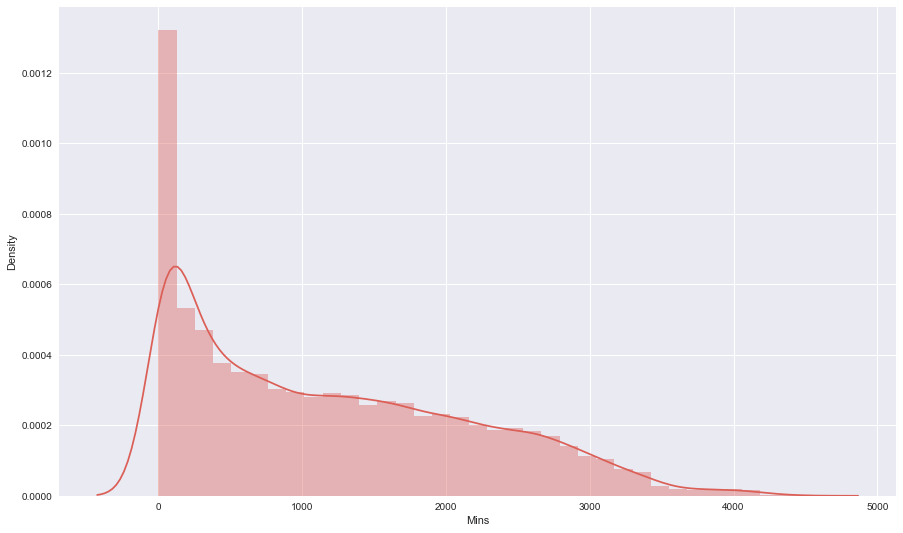

In [11]:
sns.distplot(df['Mins'])
plt.show()

In [12]:
df.head()

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
1,2019-2020,LaLiga,Guillermo Maripán Deportivo Alaves,27.0,1,90.0,0.0,7.54,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,12.0,75.0,0.0,1.0,0.0
2,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0
3,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1
4,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

mins_cut = df["Mins"] > 900
df = df[mins_cut]
df_last = df

df_sub = df.iloc[:,[0,1,2,4]]
df = df.drop(["season","league","name","Apps"], axis=1)

standard_scaler = StandardScaler()
df_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

df_check = pd.concat([df_sub, df_scaled], axis = 1)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
plt.rcParams["figure.figsize"] = (15, 9)
df_scaled.dropna()

#데이터의 대략적인 분포 및 해석을 위한 시각화 - 데이터 설명시 사용
#sns.distplot(df["Goals"], rug=False, hist=False, kde=True)
#plt.show()

df

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,34.0,2881.0,21.0,8.71,0.6,0.2,0.6,0.0,0.0,0.5,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
2,29.0,3091.0,3.0,7.47,2.7,1.9,2.5,0.1,1.9,1.7,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0
3,33.0,3155.0,8.0,7.44,0.5,0.2,0.6,0.0,0.8,0.4,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1
4,34.0,2002.0,8.0,7.33,0.1,0.0,0.5,0.0,0.4,0.4,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0
5,25.0,3144.0,1.0,7.31,2.2,1.4,2.1,0.1,1.4,1.6,...,2.5,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,36.0,1135.0,1.8,6.27,0.3,0.1,1.0,0.0,0.2,0.4,...,0.3,0.9,0.6,0.9,0.5,12.8,64.7,0.0,0.0,0.0
16772,30.0,1062.0,0.8,6.26,0.5,0.7,0.7,0.2,1.5,0.4,...,0.4,0.4,0.1,0.4,0.4,26.3,78.9,0.1,1.2,0.0
16782,34.0,1350.0,0.0,6.24,0.0,0.1,0.0,0.0,0.9,0.1,...,0.0,0.1,0.0,0.0,0.0,27.6,61.1,0.0,7.4,0.0
16803,28.0,1438.0,0.9,6.19,1.4,0.5,1.1,0.0,0.9,1.0,...,0.4,0.8,0.0,0.4,0.3,28.9,84.5,0.0,2.6,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


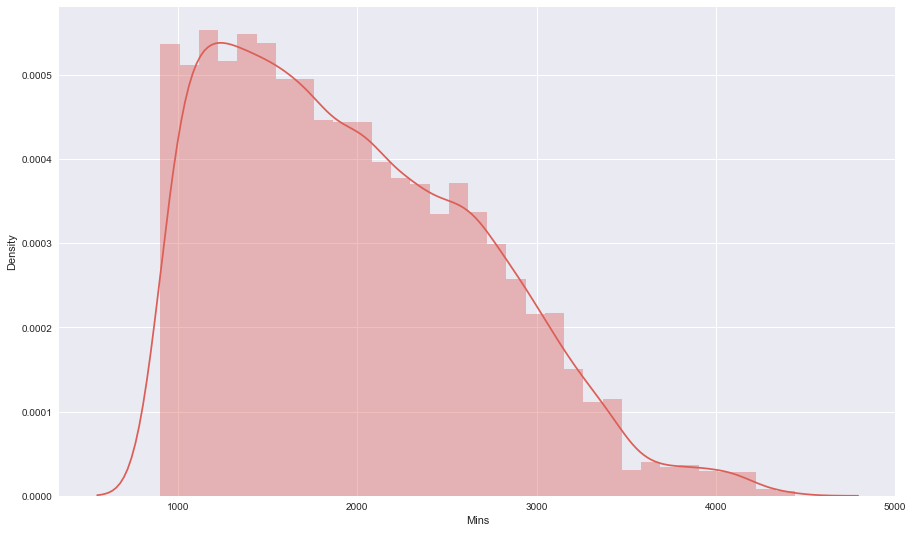

In [15]:
sns.distplot(df['Mins'])
plt.show()

In [16]:
df_scaled

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,1.425437,1.244288,12.821251,1.901030,-0.802628,-1.074721,-0.689842,-0.629603,-1.078359,-0.348806,...,2.227432,-0.335022,4.842718,1.953327,-0.167594,1.932174,0.552279,1.015117,0.008184,3.294263
1,0.251248,1.532787,1.059333,0.831541,2.194838,1.783499,3.082589,-0.181976,0.337572,2.427296,...,1.893458,-0.826666,1.131362,-0.167582,-0.173996,2.046210,0.639775,-0.291180,2.187673,-0.249179
2,1.190599,1.620710,4.326532,0.805666,-0.945364,-1.074721,-0.689842,-0.629603,-0.482177,-0.580148,...,-0.611341,0.156622,1.827242,1.347353,-0.170656,0.248466,0.762269,-0.726613,-0.397303,0.341395
3,1.425437,0.036717,4.326532,0.710792,-1.516310,-1.410982,-0.888391,-0.629603,-0.780268,-0.580148,...,0.223592,-0.007259,1.363322,0.589885,-0.172605,-0.509538,0.138133,-0.508897,-0.650731,-0.249179
4,-0.688103,1.605598,-0.247547,0.693542,1.481155,0.942846,2.288393,-0.181976,-0.035041,2.195954,...,2.895378,-0.826666,2.523121,1.195859,-0.172605,1.522986,0.155632,-0.291180,0.008184,-0.249179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,1.895112,-1.154369,0.275205,-0.203449,-1.230837,-1.242852,0.104354,-0.629603,-0.929314,-0.580148,...,-0.778328,0.484384,0.667443,0.135405,-0.173718,-1.220586,-0.491837,-0.726613,-1.106904,-0.249179
9026,0.486086,-1.254656,-0.378235,-0.212074,-0.945364,-0.234068,-0.491293,0.265652,0.039481,-0.580148,...,-0.611341,-0.335022,-0.492356,-0.622063,-0.173996,-0.315006,0.336457,-0.508897,-0.498674,-0.249179
9027,1.425437,-0.859002,-0.900987,-0.229323,-1.659047,-1.242852,-1.881136,-0.629603,-0.407655,-1.274174,...,-1.279288,-0.826666,-0.724315,-1.228037,-0.175110,-0.227802,-0.701826,-0.726613,2.643845,-0.249179
9028,0.016410,-0.738107,-0.312891,-0.272448,0.339264,-0.570329,0.302903,-0.629603,-0.407655,0.807903,...,-0.611341,0.320503,-0.724315,-0.622063,-0.174275,-0.140598,0.663107,-0.726613,0.210927,-0.249179


In [17]:
df_scaled[np.isnan(df_scaled) == True] = 0

In [18]:
df_scaled

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,1.425437,1.244288,12.821251,1.901030,-0.802628,-1.074721,-0.689842,-0.629603,-1.078359,-0.348806,...,2.227432,-0.335022,4.842718,1.953327,-0.167594,1.932174,0.552279,1.015117,0.008184,3.294263
1,0.251248,1.532787,1.059333,0.831541,2.194838,1.783499,3.082589,-0.181976,0.337572,2.427296,...,1.893458,-0.826666,1.131362,-0.167582,-0.173996,2.046210,0.639775,-0.291180,2.187673,-0.249179
2,1.190599,1.620710,4.326532,0.805666,-0.945364,-1.074721,-0.689842,-0.629603,-0.482177,-0.580148,...,-0.611341,0.156622,1.827242,1.347353,-0.170656,0.248466,0.762269,-0.726613,-0.397303,0.341395
3,1.425437,0.036717,4.326532,0.710792,-1.516310,-1.410982,-0.888391,-0.629603,-0.780268,-0.580148,...,0.223592,-0.007259,1.363322,0.589885,-0.172605,-0.509538,0.138133,-0.508897,-0.650731,-0.249179
4,-0.688103,1.605598,-0.247547,0.693542,1.481155,0.942846,2.288393,-0.181976,-0.035041,2.195954,...,2.895378,-0.826666,2.523121,1.195859,-0.172605,1.522986,0.155632,-0.291180,0.008184,-0.249179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,1.895112,-1.154369,0.275205,-0.203449,-1.230837,-1.242852,0.104354,-0.629603,-0.929314,-0.580148,...,-0.778328,0.484384,0.667443,0.135405,-0.173718,-1.220586,-0.491837,-0.726613,-1.106904,-0.249179
9026,0.486086,-1.254656,-0.378235,-0.212074,-0.945364,-0.234068,-0.491293,0.265652,0.039481,-0.580148,...,-0.611341,-0.335022,-0.492356,-0.622063,-0.173996,-0.315006,0.336457,-0.508897,-0.498674,-0.249179
9027,1.425437,-0.859002,-0.900987,-0.229323,-1.659047,-1.242852,-1.881136,-0.629603,-0.407655,-1.274174,...,-1.279288,-0.826666,-0.724315,-1.228037,-0.175110,-0.227802,-0.701826,-0.726613,2.643845,-0.249179
9028,0.016410,-0.738107,-0.312891,-0.272448,0.339264,-0.570329,0.302903,-0.629603,-0.407655,0.807903,...,-0.611341,0.320503,-0.724315,-0.622063,-0.174275,-0.140598,0.663107,-0.726613,0.210927,-0.249179


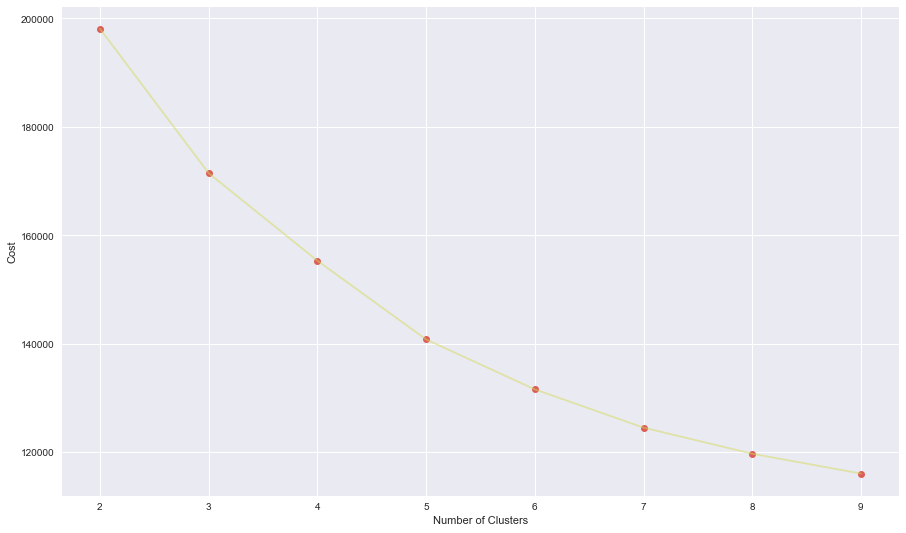

In [19]:
from sklearn.cluster import KMeans

#Find elbow point

def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(df_scaled)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost')
    
n_clusters = [2,3,4,5,6,7,8,9]
change_n_clusters(n_clusters, df_scaled)


In [20]:
#모델에 대한 결과 확인 예시 코드

kmeans = KMeans(n_clusters=240)
kmeans.fit(df_scaled)

result_by_sklearn = df_scaled.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

result_by_sklearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9030 entries, 0 to 9029
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9030 non-null   float64
 1   Mins      9030 non-null   float64
 2   Assists   9030 non-null   float64
 3   Rating    9030 non-null   float64
 4   Tackles   9030 non-null   float64
 5   Inter     9030 non-null   float64
 6   Fouls     9030 non-null   float64
 7   Offsides  9030 non-null   float64
 8   Clear     9030 non-null   float64
 9   Drb       9030 non-null   float64
 10  Blocks    9030 non-null   float64
 11  OwnG      9030 non-null   float64
 12  Goals     9030 non-null   float64
 13  SpG       9030 non-null   float64
 14  KeyP      9030 non-null   float64
 15  Drb.1     9030 non-null   float64
 16  Fouled    9030 non-null   float64
 17  Off       9030 non-null   float64
 18  Disp      9030 non-null   float64
 19  UnsTch    9030 non-null   float64
 20  KeyP.1    9030 non-null   floa

In [21]:
result_by_sklearn.head()

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,1.425437,1.244288,12.821251,1.901030,-0.802628,-1.074721,-0.689842,-0.629603,-1.078359,-0.348806,...,-0.335022,4.842718,1.953327,-0.167594,1.932174,0.552279,1.015117,0.008184,3.294263,131
1,0.251248,1.532787,1.059333,0.831541,2.194838,1.783499,3.082589,-0.181976,0.337572,2.427296,...,-0.826666,1.131362,-0.167582,-0.173996,2.046210,0.639775,-0.291180,2.187673,-0.249179,180
2,1.190599,1.620710,4.326532,0.805666,-0.945364,-1.074721,-0.689842,-0.629603,-0.482177,-0.580148,...,0.156622,1.827242,1.347353,-0.170656,0.248466,0.762269,-0.726613,-0.397303,0.341395,163
3,1.425437,0.036717,4.326532,0.710792,-1.516310,-1.410982,-0.888391,-0.629603,-0.780268,-0.580148,...,-0.007259,1.363322,0.589885,-0.172605,-0.509538,0.138133,-0.508897,-0.650731,-0.249179,163
4,-0.688103,1.605598,-0.247547,0.693542,1.481155,0.942846,2.288393,-0.181976,-0.035041,2.195954,...,-0.826666,2.523121,1.195859,-0.172605,1.522986,0.155632,-0.291180,0.008184,-0.249179,64


In [22]:
df_sub.reset_index(drop=True , inplace=True)
df_sub.info()
df_sub

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9030 entries, 0 to 9029
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  9030 non-null   object
 1   league  9030 non-null   object
 2   name    9030 non-null   object
 3   Apps    9030 non-null   object
dtypes: object(4)
memory usage: 282.3+ KB


,season,league,name,Apps
0,2019-2020,LaLiga,Lionel Messi Barcelona,32(1)
1,2019-2020,LaLiga,Casemiro Real Madrid,35
2,2019-2020,LaLiga,Karim Benzema Real Madrid,36(1)
3,2019-2020,LaLiga,Luis Suárez Barcelona,22(6)
4,2019-2020,LaLiga,Mikel Merino Real Sociedad,35(1)
...,...,...,...,...
9025,2019-2020,USA,Bradley Wright-Phillips New York,9(16)
9026,2019-2020,USA,Saad Abdul-Salaam Seattle,11(7)
9027,2019-2020,USA,Przemyslaw Tyton FC Cincinnati,15
9028,2019-2020,USA,Caleb Stanko FC Cincinnati,16(7)


In [40]:
#해당 클러스터에 속하는 선수들 전체 확인

df_c = result_by_sklearn[['cluster']]

df_cluster = pd.concat([df_sub, df_c], axis = 1)
#df_cluster

find_player = input("살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : ")
idx = df_cluster.index[df_cluster['name'] == find_player]
cluster_idx = []
for i in idx:
    cluster_idx.append(int(df_cluster.loc[i,["cluster"]].values))
print(cluster_idx)

#예시 : Lionel Messi Barcelona (복사해서 확인) / Nuno Tavares Benfica

#판다스 열 전체 보기 None 대신 10으로 두기
pd.set_option('display.max_rows', None)


p = 0
for i in cluster_idx:
    print("---------------------------------------------------------------------------------")
    print("기준 선수")
    print("")
    print(df_cluster.loc[idx[p],:])
    print("---------------------------------------------------------------------------------")
    print(df_cluster.loc[(df_cluster['cluster'] == i)])
    print("---------------------------------------------------------------------------------")
    p += 1
    
#각 k-mean의 k에 대해서 실루엣 계수 살펴보기

살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : Emiliano Buendía Norwich
[210, 80]
---------------------------------------------------------------------------------
기준 선수

season                    2020-2021
league                 Championship
name       Emiliano Buendía Norwich
Apps                             39
cluster                         210
Name: 1734, dtype: object
---------------------------------------------------------------------------------
         season        league                        name   Apps  cluster
947   2020-2021      SuperLig     Rachid Ghezzal Besiktas  30(1)      210
960   2020-2021      SuperLig  Max-Alain Gradel Sivasspor     39      210
1312  2019-2020  Championship   Matheus Pereira West Brom  38(4)      210
1317  2019-2020  Championship        Jed Wallace Millwall     43      210
1734  2020-2021  Championship    Emiliano Buendía Norwich     39      210
2461  2020-2021     LeagueOne    Aiden McGeady Sunderland  30(1)      210
2925  2019-2020     LeagueTwo     Rande

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


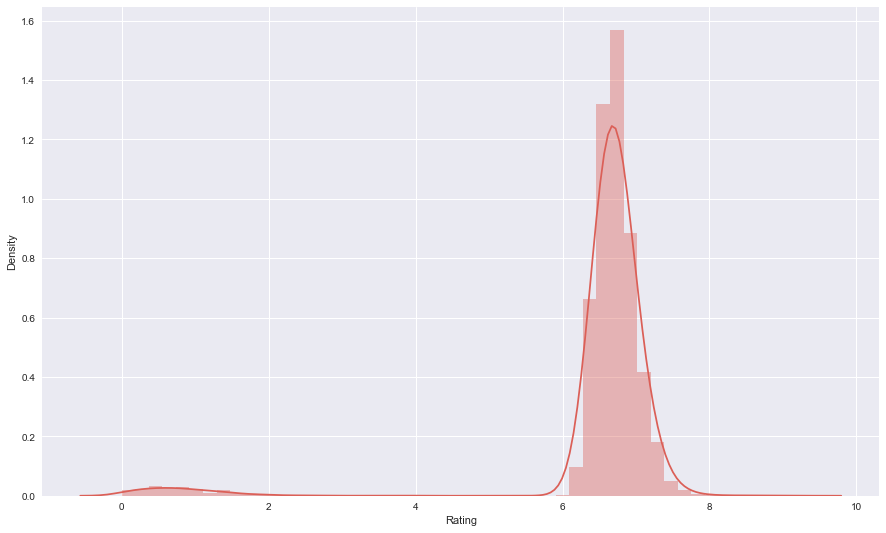

In [29]:
#아웃라이어의 기준 => Mins가 특정 값 이하인 선수
#즉 , 표본이 적어 평균적인 수치를 확인하기 어려운 선수

#특별한 선수들은 아웃라이어가 아닌 특정 지표의 기준이 될 수 있다.

#아웃라이어의 기준? => 기본으로 생각하면 Rating 그렇다면 Rating을 기준으로 아웃라이어 체크? 가능은하다.
#혹은 비전문가들의 눈으로 살펴보는 특정 지표를 통한 아웃라이어 검출 , 이를 통해서 기준점 생각 가능

#그런데 특정 아웃라이어 즉 특별한 선수들이 클러스터링 되지 못하는 상황이 생긴다? 그렇다면 k-mean에서 이 선수들을
#다 포함할 수 있을 때까지 돌린다는 마인드

sns.distplot(df['Rating'])
plt.show()


In [30]:
df_last.reset_index(drop=True , inplace=True)
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9030 entries, 0 to 9029
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    9030 non-null   object 
 1   league    9030 non-null   object 
 2   name      9030 non-null   object 
 3   age       9030 non-null   float64
 4   Apps      9030 non-null   object 
 5   Mins      9030 non-null   float64
 6   Assists   9030 non-null   float64
 7   Rating    9030 non-null   float64
 8   Tackles   9030 non-null   float64
 9   Inter     9029 non-null   float64
 10  Fouls     9030 non-null   float64
 11  Offsides  9030 non-null   float64
 12  Clear     9030 non-null   float64
 13  Drb       9030 non-null   float64
 14  Blocks    9030 non-null   float64
 15  OwnG      9030 non-null   float64
 16  Goals     9030 non-null   float64
 17  SpG       9030 non-null   float64
 18  KeyP      9030 non-null   float64
 19  Drb.1     9030 non-null   float64
 20  Fouled    9030 non-null   floa

In [31]:
df_check = df_check.dropna(axis=0)

df_merge = pd.concat([df_last, df_cluster["cluster"]], axis = 1)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9030 entries, 0 to 9029
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    9030 non-null   object 
 1   league    9030 non-null   object 
 2   name      9030 non-null   object 
 3   age       9030 non-null   float64
 4   Apps      9030 non-null   object 
 5   Mins      9030 non-null   float64
 6   Assists   9030 non-null   float64
 7   Rating    9030 non-null   float64
 8   Tackles   9030 non-null   float64
 9   Inter     9029 non-null   float64
 10  Fouls     9030 non-null   float64
 11  Offsides  9030 non-null   float64
 12  Clear     9030 non-null   float64
 13  Drb       9030 non-null   float64
 14  Blocks    9030 non-null   float64
 15  OwnG      9030 non-null   float64
 16  Goals     9030 non-null   float64
 17  SpG       9030 non-null   float64
 18  KeyP      9030 non-null   float64
 19  Drb.1     9030 non-null   float64
 20  Fouled    9030 non-null   floa

In [32]:
q1=df_merge['Rating'].quantile(0.25)
q2=df_merge['Rating'].quantile(0.5)
q3=df_merge['Rating'].quantile(0.75)
iqr=q3-q1
iqr

0.33999999999999986

In [33]:
rating_outs=df_merge['Rating']>q3+1.5*iqr
df_outs = df_merge[rating_outs]
a=df_merge[rating_outs].index
print(a)

Int64Index([   0,    1,    2,  331,  332,  333,  667,  668,  669,  670,
            ...
            8339, 8340, 8665, 8666, 8667, 8668, 8669, 8670, 8671, 8672],
           dtype='int64', length=135)


In [35]:
a = list(a)
cluster_list = []
for i in a:
    name = df_merge.iloc[i,2]
    print(name , end=" / ")
    print(df_merge.iloc[i,0] , end=" / ")
    print(df_merge.iloc[i,30])
    cluster_list.append(df_merge.iloc[i,30])
cluster_list.sort()
set(cluster_list)
print(cluster_list)

Lionel Messi Barcelona / 2019-2020 / 131
Casemiro Real Madrid / 2019-2020 / 180
Karim Benzema Real Madrid / 2019-2020 / 163
Lionel Messi Barcelona / 2020-2021 / 131
Gerard Moreno Villarreal / 2020-2021 / 58
Karim Benzema Real Madrid / 2020-2021 / 58
José Sosa Trabzonspor / 2019-2020 / 50
Alexander Sørloth Trabzonspor / 2019-2020 / 58
Edin Visca Istanbul Basaksehir / 2019-2020 / 50
Anthony Nwakaeme Trabzonspor / 2019-2020 / 92
Rachid Ghezzal Besiktas / 2020-2021 / 210
Saïd Benrahma Brentford / 2019-2020 / 92
Matheus Pereira West Brom / 2019-2020 / 210
Emiliano Buendía Norwich / 2020-2021 / 210
Kieffer Moore Cardiff / 2020-2021 / 76
Krystian Bielik Derby / 2020-2021 / 16
Ivan Toney Brentford / 2020-2021 / 238
James Tavernier Rangers / 2020-2021 / 50
Ryan Kent Rangers / 2020-2021 / 92
Marcus Browne Oxford / 2019-2020 / 176
Vadaine Oliver Gillingham / 2020-2021 / 163
Robert Atkinson Oxford / 2020-2021 / 154
Jayden Stockley Charlton / 2020-2021 / 218
Aiden McGeady Sunderland / 2020-2021 / 2

In [36]:
df_merge.head()

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6,131
1,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0,180
2,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1,163
3,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0,163
4,2019-2020,LaLiga,Mikel Merino Real Sociedad,25.0,35(1),3144.0,1.0,7.31,2.2,1.4,...,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0,64


In [37]:
pd.set_option('display.max_rows', 10 )
df_merge

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6,131
1,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0,180
2,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1,163
3,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0,163
4,2019-2020,LaLiga,Mikel Merino Real Sociedad,25.0,35(1),3144.0,1.0,7.31,2.2,1.4,...,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,2019-2020,USA,Bradley Wright-Phillips New York,36.0,9(16),1135.0,1.8,6.27,0.3,0.1,...,0.9,0.6,0.9,0.5,12.8,64.7,0.0,0.0,0.0,200
9026,2019-2020,USA,Saad Abdul-Salaam Seattle,30.0,11(7),1062.0,0.8,6.26,0.5,0.7,...,0.4,0.1,0.4,0.4,26.3,78.9,0.1,1.2,0.0,115
9027,2019-2020,USA,Przemyslaw Tyton FC Cincinnati,34.0,15,1350.0,0.0,6.24,0.0,0.1,...,0.1,0.0,0.0,0.0,27.6,61.1,0.0,7.4,0.0,203
9028,2019-2020,USA,Caleb Stanko FC Cincinnati,28.0,16(7),1438.0,0.9,6.19,1.4,0.5,...,0.8,0.0,0.4,0.3,28.9,84.5,0.0,2.6,0.0,133


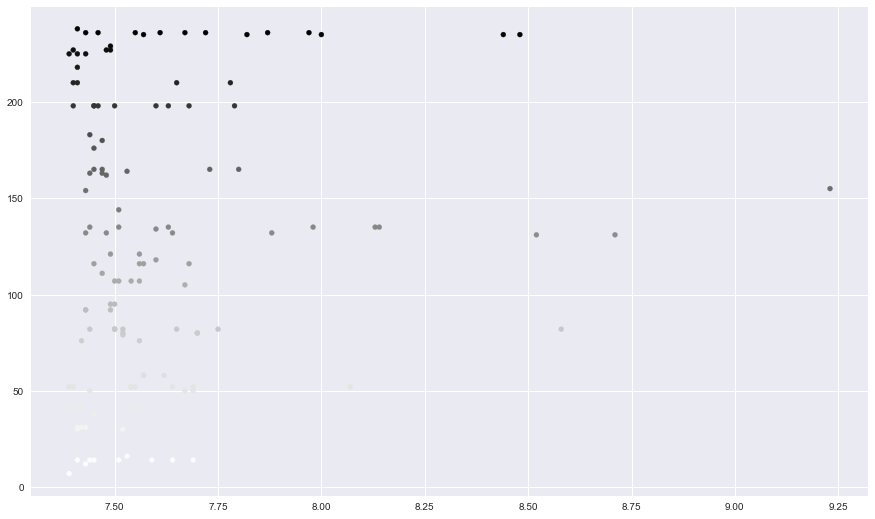

In [38]:
plt.scatter(df_outs["Rating"], df_outs["cluster"], s=25, c=df_outs["cluster"])
plt.show()

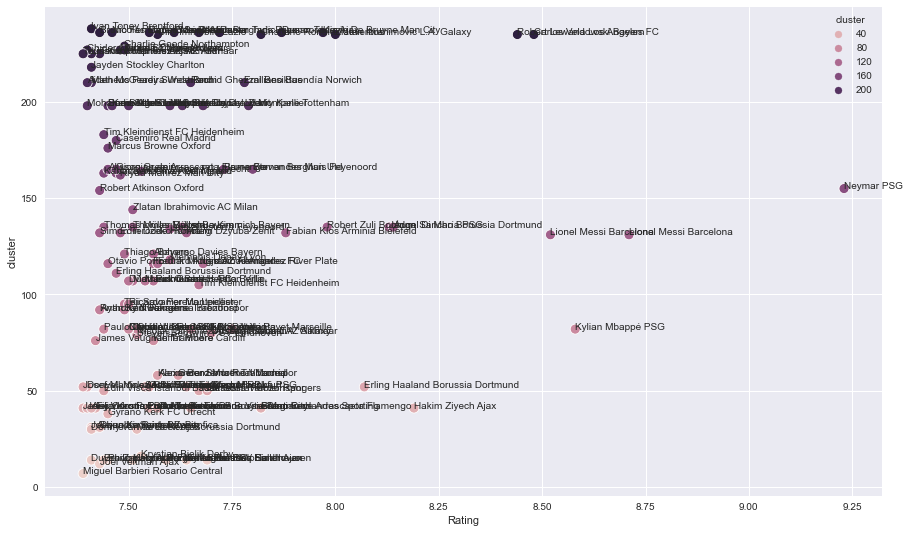

In [39]:
sns.scatterplot(x='Rating', 
                y='cluster', 
                hue='cluster',
                s=100, 
                data=df_outs)

for i,k,p in zip(df_outs["Rating"],df_outs["cluster"],df_outs["name"]):
    plt.text(i, k, p)
    

plt.show()

#결과는 nan 값 즉 아웃츠 중에 분류가 안된 녀석들 뺴고는 다 나옴 / 전체 아웃츠가 포함되도록 세팅해서 돌려보면 괜찮을 듯
#이후 결과 검증은 이름나지 않은 선수들이 현재 시즌에 어떤 팀으로 옮겼나 혹은 퍼포먼스? 이건 너무 간거 갔기도 함


#다듬거나 생각해야할 부분들

#1. 시각화 부분에서는 좀더 다듬어야할 필요가 보이긴 함
#2. 현재는 나쁜 지표까지도 포함해서 클러스터링을 하고 있다. 최고의 선수들과 함께 클러스터링 되는 것을 보는 관점이라면
#굳이 나쁜 것까지 생각해야하나? 그렇게 생각하면 나쁜 지표에서 탑을 달리는 선수들이 아웃라이어에 포함되는 것이 아닌가?
#3. 위에 대한 답으로는 일정 rating 이상을 보도록 하면 될 듯하다.

#아무튼 결론적으로 절대 어느 클러스터에도 속하지 않으려는 튀는 값들 즉 성적이 뛰어난 선수들을 어떻게든 분리하는게 목적이라면
#k의 개수를 많이 늘리는 것이 절대적으로 좋다? 라는 물음에 대해 고민해야함